# Microsoft App Store Analysis
This notebook analyzes the [Windows Store dataset](https://www.kaggle.com/vishnuvarthanrao/windows-store) by Vishnu Varthan Rao from Kaggle. The dataset has information about the Windows App Store in India, from the last decade (2010-2020). The dataset consists of six features: app name, app rating, number of people rated, category, date and price. We will clean the dataset, perform some exploratory data analysis & visualization, then train a linear regression model to predict app price.
## Key Findings
- 97% of the apps on the Windows store are free to download
- Music, books and business are the three most popular app categories
- In the last decade, 2016 saw the most app downloads
- January is the most popular month to release an app
- 75% of apps have 1-3 words in their name
- "Radio" is the most common word in all the app names

    Analysis by Wesley Laurence
    7/29/2020

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# load dataset into dataframe
df = pd.read_csv('msft.csv')

In [3]:
# view first five rows
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [4]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


## Data Preparation

In [5]:
# check if there are any missing values
df.isnull().values.any()

True

In [6]:
# drop row with missing values
df.dropna(inplace=True)

<b>Convert the price column from string values to float values. Price is measured in the Indian rupee (₹).</b>

In [7]:
# convert price strings into float values
all_prices = list(df['Price'])
new_price_column = []

# iterate through each value in column
for price in all_prices:
    
    if 'Free' in price:
        new_price_column.append(float(0))
        
    elif '₹' in price:
        
        # remove ₹ currency symbol
        price = price[2:]
        
        # remove ',' characters
        if ',' in price:
            price_elements = price.split(',')
            
            price = price_elements[0] + price_elements[1]
            
        new_price_column.append(float(price))

# update column in dataframe        
df['Price'] = new_price_column

<b>Convert date strings to pandas date objects and parse year, month and day into seperate columns.</b>

In [8]:
# containers for data
date_objects = []
years = []
months = []
days = []

# iterate through each row in dataframe
for string_data in df['Date']:
    date_object = pd.to_datetime(string_data).date()
    date_objects.append(date_object)
    years.append(date_object.year)
    months.append(date_object.month)
    days.append(date_object.day)
    
# add new columns to dataframe
df['Date'] = date_objects
df['Year'] = years
df['Month'] = months
df['Day'] = days

# Exploratory Data Analysis

In [9]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# set seaborn style
sns.set(style="whitegrid")

In [11]:
# statistical analysis
df.describe()

,Rating,No of people Rated,Price,Year,Month,Day
count,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
mean,3.792708,551.798722,11.012253,2015.942868,6.380568,16.051682
std,0.991681,259.787733,117.202914,2.168149,3.468233,9.016451
min,1.000000,100.000000,0.000000,2010.000000,1.000000,1.000000
25%,3.500000,327.000000,0.000000,2014.000000,3.000000,8.000000
50%,4.000000,548.000000,0.000000,2016.000000,6.000000,16.000000
75%,4.500000,779.000000,0.000000,2018.000000,9.000000,24.000000
max,5.000000,1000.000000,5449.000000,2020.000000,12.000000,31.000000


## Category Analysis
Music, books and business apps are the most popular app categories on the Windows app store.

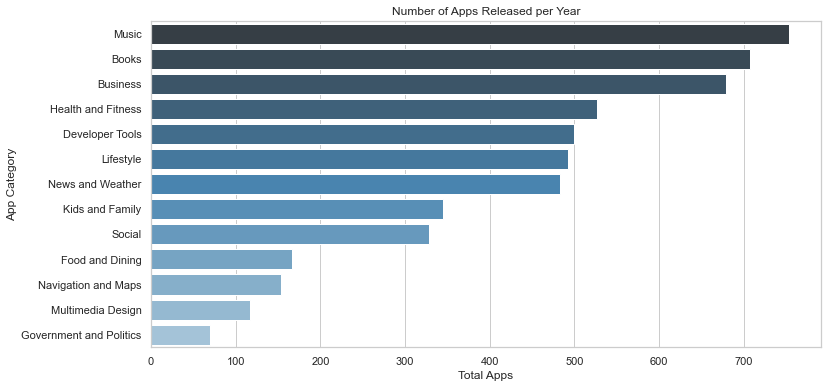

In [12]:
# category value counts
category_value_counts = df['Category'].value_counts()

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# barplot for category value counts
plot = sns.barplot(x=list(category_value_counts),
                 y=category_value_counts.index,
                 palette="Blues_d")

# set labels
set_labels = plot.set(title='Number of Apps Released per Year',xlabel="Total Apps", ylabel = "App Category")

## Rating Analysis
The rating distribution is slightly skewed left with a mean of 3.8.

In [13]:
# statistical analysis
df['Rating'].describe()

count    5321.000000
mean        3.792708
std         0.991681
min         1.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### Ratings value count

In [14]:
# groupby rating and count
ratings_count_series = df.groupby('Rating').count()['Name']

# convert to dataframe
ratings_count_df = pd.DataFrame(ratings_count_series)

# set column name
ratings_count_df.columns = ['Count']

# sort values by count in descending order
ratings_count_df.sort_values('Count', ascending=False)

,Count
Rating,
4.0,1299
5.0,968
4.5,900
3.5,844
3.0,615
2.5,276
1.0,201
2.0,156
1.5,62


#### Ratings Distplot

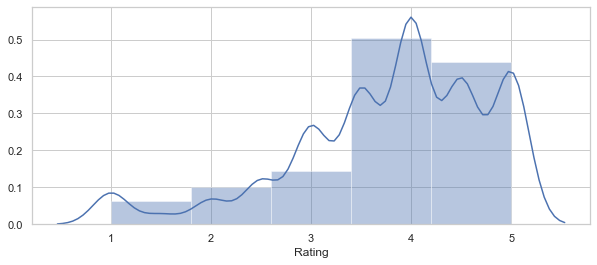

In [15]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create distplot
plot = sns.distplot(df['Rating'],bins=5)

#### Ratings Boxplot

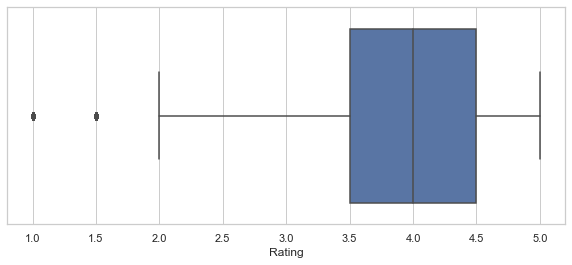

In [16]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create boxplot
plot = sns.boxplot(x=df["Rating"])

## Number of Ratings Analysis
The distribution of number of ratings per apps is roughly uniform with a mean of 551 ratings.

In [17]:
# statistical analysis
df['No of people Rated'].describe()

count    5321.000000
mean      551.798722
std       259.787733
min       100.000000
25%       327.000000
50%       548.000000
75%       779.000000
max      1000.000000
Name: No of people Rated, dtype: float64

#### Number of Ratings Distplot

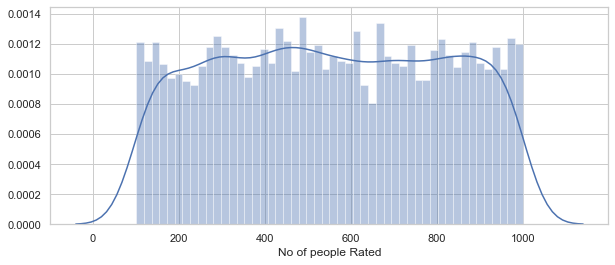

In [18]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create distplot
plot = sns.distplot(df['No of people Rated'],bins=50)

#### Number of Ratings Boxplot

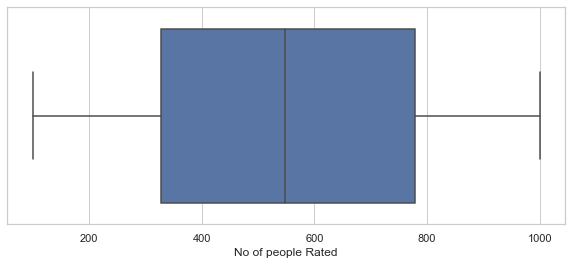

In [19]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create boxplot
plot = sns.boxplot(x=df["No of people Rated"])

## Price Analysis
The price distribution is heavily skewed right and 97% of the apps are free to download.

#### Price Distplot

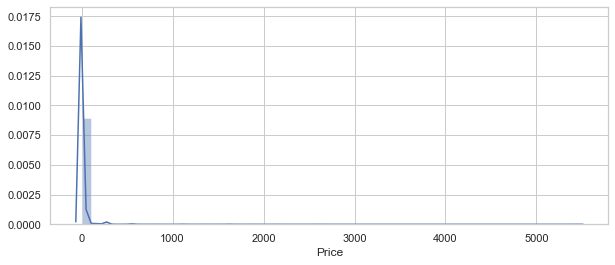

In [20]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create distplot
plot = sns.distplot(df['Price'],bins=50)

#### Price Boxplot

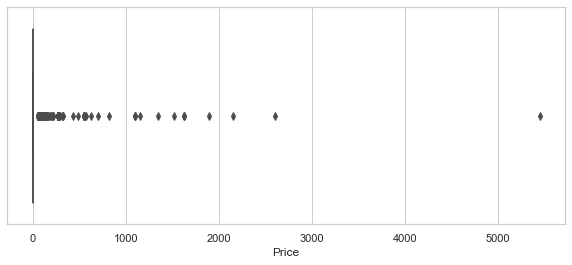

In [21]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create boxplot
plot = sns.boxplot(x=df["Price"])

#### Percentage of apps that are free: 97%

In [22]:
total_free = len(df[df['Price']==0])
total_rows = len(df['Price'])
percent_free = round((total_free / total_rows)*100)
print(str(percent_free)+'% of apps are free to download')

97% of apps are free to download


## Date Analysis
In the last decade, 2016 saw the most app downloads and January is the most popular month to release an app.

#### Barplot for total apps released per year

In [2]:
# value count for year column
year_value_counts = df['Year'].value_counts()

# color scheme
colors = ['lightgrey' if (x < max(year_value_counts)) else 'red' for x in year_value_counts.sort_index() ]

# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
plot = sns.barplot(x=year_value_counts.index,
                 y=list(year_value_counts),
                 palette=colors)

# set labels
set_labels = plot.set(title='Total Apps Released per Year',xlabel="Year", ylabel = "Total Apps Released")

NameError: name 'df' is not defined

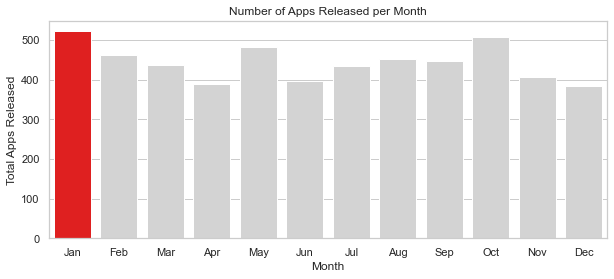

In [24]:
# barplot for total apps released per month
month_value_counts = df['Month'].value_counts()

# color scheme
colors = ['lightgrey' if (x < max(month_value_counts)) else 'red' for x in month_value_counts.sort_index() ]

# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# create barplot
plot = sns.barplot(x=month_value_counts.index,
                 y=list(month_value_counts),
                 palette=colors)

# set title and axis labels
set_labels = plot.set(title='Number of Apps Released per Month',xlabel="Month", ylabel = "Total Apps Released")

# set xtick labels
set_ticks = plot.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## App Name Analysis
75% of apps have 1-3 words in their name and "Radio" is the most common word in all the app names.

#### Name Word Count

In [25]:
# container for word_count data
name_word_count = []

# iterate through each name in colum
for name in df['Name']:
    word_count = len(name.split())
    name_word_count.append(word_count)
    
# add word count data to dataframe
df['Name Word Count'] = name_word_count

In [26]:
# app names with 1-3 words are most popular
df['Name Word Count'].value_counts().head(3)

2    1632
3    1170
1    1111
Name: Name Word Count, dtype: int64

In [27]:
# 73.54 % of app names have 1-3 words
percent = ((1632 + 1170 + 1111) / len(name_word_count)) * 100
round(percent, 2)

73.54

#### Most common words in app name

In [28]:
# container for all words
all_words = []

# iterate through each name in column
for name in df['Name']:
    
    # split string into list
    name_words = name.split()
    
    # iterate through each word in app name
    for word in name_words:
        
        # remove extraneous characters
        word = word.replace(",","").replace(":","").replace("-","").replace("®","").replace("&","")
        
        # if word is empty, do not append
        if word == " " or word == "":
            pass
        
        # append all words to main list
        else:
            all_words.append(word.lower())  

In [29]:
# top 10 most common words in app names
app_names_word_count = pd.Series(all_words).value_counts().head(10)
app_names_word_count

radio       357
for         283
and         261
music       202
stations    174
by          146
news        140
free        140
the         134
online      116
dtype: int64

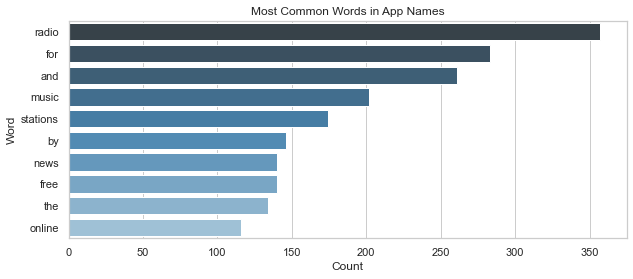

In [30]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# barplot for category value counts
plot = sns.barplot(x=list(app_names_word_count),
                 y=app_names_word_count.index,
                 palette="Blues_d")

# set labels
set_labels = plot.set(title='Most Common Words in App Names',xlabel="Count", ylabel = "Word")

### Multivariate Analysis

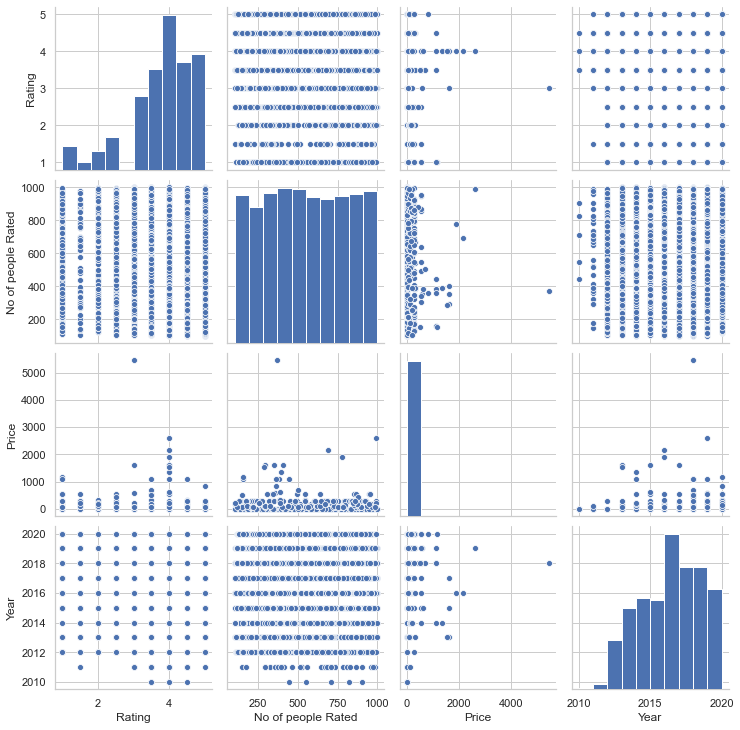

In [31]:
# pairplot of all numerical values in dataset
sns.pairplot(df[['Rating','No of people Rated','Price','Year']])

#### Heatmap of correlations

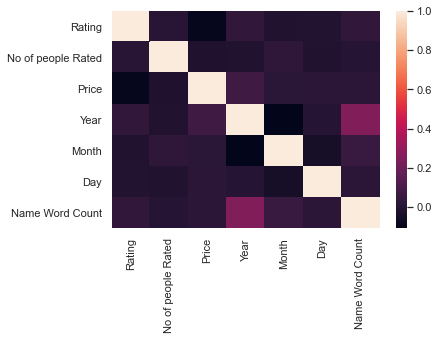

In [32]:
plot = sns.heatmap(df.corr())

#### Jointplot of app price by year

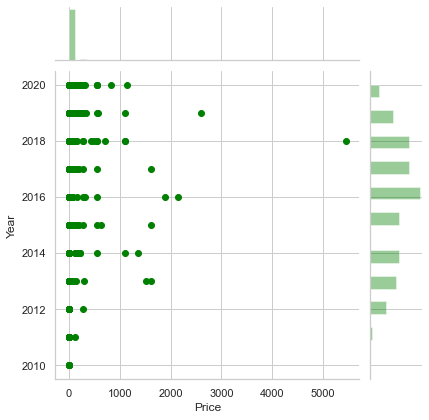

In [33]:
plot = sns.jointplot(x='Price',y='Year',data=df,color='green')

#### Jointplot of app price by rating

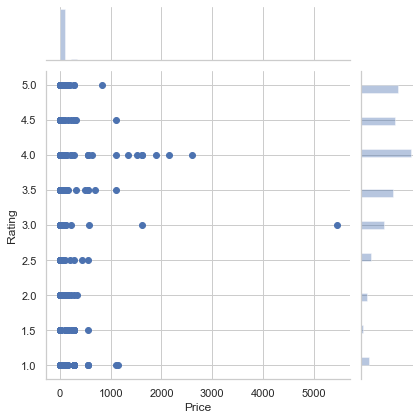

In [34]:
plot = sns.jointplot(x='Price',y='Rating',data=df)

# Linear Regression Model

### Label encoding

Before we train our model, lets encode the string values in the Category column as integer values.

In [35]:
from sklearn import preprocessing

In [36]:
# create label encoder object
le = preprocessing.LabelEncoder()

In [37]:
string_category_column = df['Category']

In [38]:
# fit to category column data
le.fit(string_category_column)

LabelEncoder()

In [39]:
list(le.classes_)

['Books',
 'Business',
 'Developer Tools',
 'Food and Dining',
 'Government and Politics',
 'Health and Fitness',
 'Kids and Family',
 'Lifestyle',
 'Multimedia Design',
 'Music',
 'Navigation and Maps',
 'News and Weather',
 'Social']

In [40]:
encoded_category_column = le.transform(string_category_column)

In [41]:
df['Category'] = encoded_category_column

### Standard Scaling

In [42]:
features = df[['Rating','No of people Rated','Category']]

In [43]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [44]:
# create StandardScaler object
scaler = StandardScaler()

In [45]:
# fit scaler to features
scaler.fit(features)

StandardScaler()

In [46]:
# use the .transform method to transform features
scaled_features = scaler.fit_transform(features)

In [47]:
# create new scaled dataframe
df_feat = pd.DataFrame(scaled_features,columns=features.columns)

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df_feat
y = df['Price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Linear Regression
Given the rating, category and number of ratings, predict app price. 

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

### Predictions and Evaluation

In [54]:
predictions = lm.predict(X_test)

In [55]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22.934647805887344
MSE: 8739.135380622783
RMSE: 93.48334279764916


<b> For questions about this report, email Wesley Laurence at wesleylaurencetech@gmail.com</b>